# Homework 2 - EECS 600 Deep Learning

Name: Sheng Guan

Instructions: All assignments are to be completed individually. Please complete each question as best you can. Once you have completed all of the problems, reset your runtime or kernel and run the notebook in order. Download the .ipynb file and submit it via Canvas.

Library usage: Several of the algorithms implemented in this, and other assignments, have implementations available in tensorflow. For this assignment, you are limited to basic operations within tensorflow and cannot use their high level APIs like tf.optimizer, tf.keras, etc.

All code presented in class is free to use in your assignments.

Your grade is based on the correctness of your implementation, not the quality of your code but you are encouraged to include comments in your code to help the graders understand your decisions.

For clarity, the final operation you should take is restarting the runtime and running all.

Due Date: 10/15/19 - midnight EST

100 Points Total

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf.enable_eager_execution()
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 1.15.0-rc3


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255. 

11493376/11490434 [==============================] - 0s 0us/step


## Recommendation
When building and testing your code, work on a smaller subset of the data. [This example](https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array) may help in that.

Additionally, if you are having trouble getting autoencoders to fit with sigmoid hidden units, feel free to change them to ReLU units instead.

# Question 1
Implement an autoencoder that encodes MNIST images as a 64 dimensional representation. Your hidden layer should use sigmoid activation functions. Determine an appropriate learning rate and number of epochs to train your model. Use a minibatch size of 128.

In [0]:
print(x_train.shape[1])

784


In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class Model(object):
  def __init__(self, num_inputs, num_hidden=64):
    # NOTE: This is called "Glorot" Uniform Initialization
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
    self.previous_loss = []
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    '''
    a1 = tf.nn.relu(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    '''
    
    
    
    a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
   
    return a1
    
  
  def decode(self, h):
    #change to sigmod function according to the requirement, but cannot get the good results
    '''
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    '''
    a2 = tf.nn.relu(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
  #def step(self, inputs, outputs):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
   
    
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)
    
#quick test the model's forward function    
model = Model(x_train.shape[1])
model.forward(x_train[:5, :])

<tf.Tensor: id=63, shape=(5, 784), dtype=float32, numpy=
array([[0.371621  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3340258 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29699445, 0.02696797, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30385575, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29059488, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)>

In [0]:
model = Model(x_train.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
for epoch in range(150):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model.step(x_train_, x_train_, learning_rate)
    #model.step(x_train_,x_train_)

  train_loss = loss(x_train, model(x_train))
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
    
  test_loss = loss(x_test, model(x_test))
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  
  

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.09
The train loss value for epoch 1 is 0.09
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.09
The test loss value for epoch 2 is 0.09
The train loss value for epoch 3 is 0.09
The test loss value for epoch 3 is 0.09
The train loss value for epoch 4 is 0.09
The test loss value for epoch 4 is 0.09
The train loss value for epoch 5 is 0.09
The test loss value for epoch 5 is 0.09
The train loss value for epoch 6 is 0.09
The test loss value for epoch 6 is 0.09
The train loss value for epoch 7 is 0.09
The test loss value for epoch 7 is 0.09
The train loss value for epoch 8 is 0.09
The test loss value for epoch 8 is 0.09
The train loss value for epoch 9 is 0.09
The test loss value for epoch 9 is 0.09
The train loss value for epoch 10 is 0.09
The test loss value for epoch 10 is 0.09
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.09
The train loss value for

<Figure size 432x288 with 0 Axes>

Plot the training and testing reconstruction error for each epoch for your chosed number of epochs and learning rate using matplotlib.

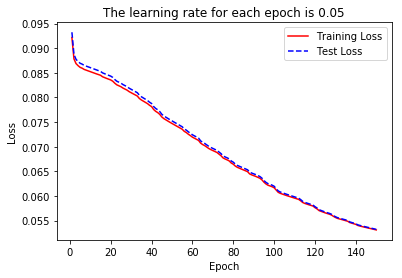

In [0]:
epoch_count = range(1, len(train_loss_result) + 1)
plt.plot(epoch_count, train_loss_result, 'r-')
plt.plot(epoch_count, test_loss_result, 'b--')
plt.legend(['Training Loss', 'Test Loss'])
plt.title(f'The learning rate for each epoch is {learning_rate:0.2f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Plot a 10x10 image of reconstructred random examples from your testing set.

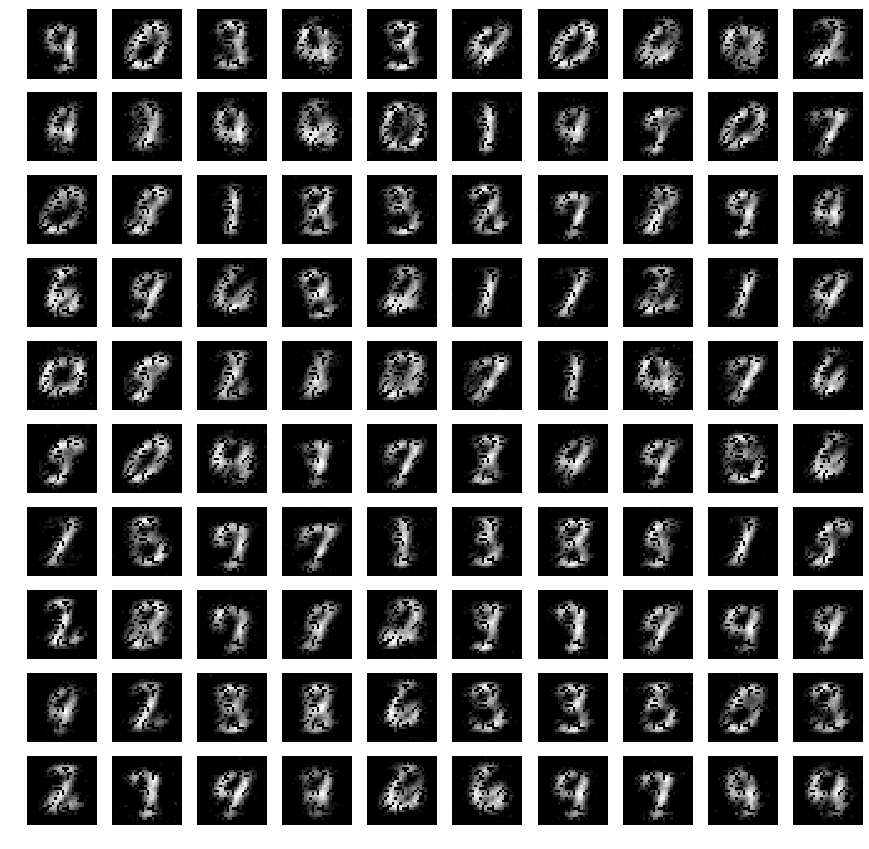

In [0]:
x_test_hat = model(x_test)
'''
#test one image
test_img = np.reshape(x_test_hat.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)
'''
#select random examples from test set
random_ind = np.random.randint(x_test_hat.shape[0], size=(100,))
#print(random_ind)
n_elements = 10
figure, axes = plt.subplots(nrows=n_elements, ncols=n_elements)
figure.set_size_inches(15, 15)

  
for idx, axis in enumerate(axes.flat):
  #img = np.reshape(W1[:, idx], (28, 28))
  test_img = np.reshape(x_test_hat.numpy()[random_ind[idx],:], (28, 28))
  image = axis.imshow(test_img, cmap=plt.cm.gray)
  axis.set_frame_on(False)
  axis.set_axis_off()
 



How did you determine the appropriate learning rate and number of epochs for training?

The methodology to decide the appropriate learning rate is to apply learning rate finder (LRFinder) which comes from a paper called “Cyclical Learning Rates for Training Neural Networks” by Leslie Smith. The essential idea is to start with a very small learning rate (e.g. 1e-10) and exponentially increase the learning rate with each training step. Then, you can record the training loss and continue until you see the training loss grow rapidly. At this point, that usually means your learning rate reaches too high and training loss increases rapidly. Then you can find the section where loss is decreasing fastest by looking at the figure of training step (as x-axes) and loss (log-scale and as y-axes). In the end, you use the learning rate that was being used at that training step by looking at the figure of training step (as x-axes) and learning rate (as y-axes). 

Reference: https://medium.com/octavian-ai/how-to-use-the-learning-rate-finder-in-tensorflow-126210de9489

The methodology to decide the number of epochs can be determined by the differences between two training losses. You can monitor a certain range of training epochs, e.g. recent i+k epochs, and compare the training loss difference between epoch i and epoch i+k (or the mean value of training loss in recent k epochs ). If the training loss difference is below the threshold, it is an indicator that the training tends to converge. We can terminate the training process and set the number of epochs as i+k.


## Question 1 Part 2
Add an $L_1$ regularization weight term to your loss function only on the weights to your encoder. Your new loss function should be $L(X) = \sum_i(X_i - decode(encode(X_i)))^2 + \alpha\sum_j|W_j|$ where $X$ is a minibatch of your data. Determine an appropriate value of $\alpha$. If you are having trouble getting started, consider values in powers of 10, i.e. $\alpha = 10^-5, 10^-4, 10^-3, ..., 10^1, 10^2, 10^3$.

In [0]:
def loss(y_hat, y,W,alpha):
  #print("first part loss is %0.4f" %(tf.reduce_mean(tf.square(y_hat - y))))
  #print("second part loss is %0.4f"%(tf.reduce_mean(tf.abs(W))))
  #scale= tf.reduce_mean(tf.square(y_hat - y))/tf.reduce_mean(tf.abs(W))
  #print("scale is %d"%scale)
  return tf.reduce_mean(tf.square(y_hat - y)) + alpha * tf.reduce_mean(tf.abs(W))

class Model2(object):
  def __init__(self, num_inputs, num_hidden=64):
    # NOTE: This is called "Glorot" Uniform Initialization
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
  
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    '''
    a1 = tf.nn.relu(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    '''
    
    
    
    a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
   
    return a1
    
  
  def decode(self, h):
    #change to sigmod function according to the requirement, but cannot get the good results
    '''
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    '''
    a2 = tf.nn.relu(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate,alpha):
  #def step(self, inputs, outputs):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs,self.W1,alpha)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
   
    
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    #print (self.W1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)
    
#quick test the model's forward function    
#model2 = Model2(x_train.shape[1])
#model2.forward(x_train[:5, :])

In [0]:
model2 = Model2(x_train.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
#initialize the alpha value in loss function
alpha = 0.1
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
weight_regularization_result =[]
for epoch in range(150):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model2.step(x_train_, x_train_, learning_rate,alpha)


  train_loss = loss(x_train, model2(x_train),model2.W1,alpha)
  #Always make sure that two items in loss function are relatively in the equal scale.
  weight_regularization = tf.reduce_mean(tf.abs(model2.W1)).numpy()
  #print(weight_regularization)
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
  weight_regularization_result.append(weight_regularization)
  #print(weight_regularization_result)
    
  test_loss = loss(x_test, model2(x_test),model2.W1,alpha)
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.10
The train loss value for epoch 1 is 0.09
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.09
The test loss value for epoch 2 is 0.09
The train loss value for epoch 3 is 0.09
The test loss value for epoch 3 is 0.09
The train loss value for epoch 4 is 0.09
The test loss value for epoch 4 is 0.09
The train loss value for epoch 5 is 0.09
The test loss value for epoch 5 is 0.09
The train loss value for epoch 6 is 0.09
The test loss value for epoch 6 is 0.09
The train loss value for epoch 7 is 0.09
The test loss value for epoch 7 is 0.09
The train loss value for epoch 8 is 0.09
The test loss value for epoch 8 is 0.09
The train loss value for epoch 9 is 0.09
The test loss value for epoch 9 is 0.09
The train loss value for epoch 10 is 0.09
The test loss value for epoch 10 is 0.09
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.09
The train loss value for

<Figure size 432x288 with 0 Axes>

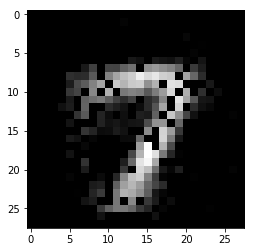

In [0]:
x_test_hat = model2(x_test)
#test one image
test_img = np.reshape(x_test_hat.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

Plot the training and testing reconstruction error for each epoch for your chosed number of epochs and learning rate using matplotlib. Additionally, plot the weight regularization value at each epoch ($\sum_j|W_j|$).

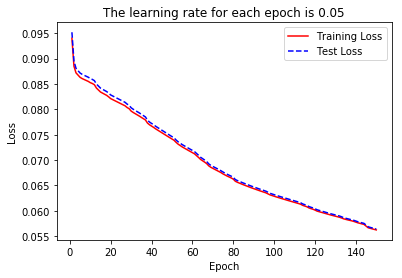

In [0]:
epoch_count = range(1, len(train_loss_result) + 1)
plt.plot(epoch_count, train_loss_result, 'r-')
plt.plot(epoch_count, test_loss_result, 'b--')
plt.legend(['Training Loss', 'Test Loss'])
plt.title(f'The learning rate for each epoch is {learning_rate:0.2f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

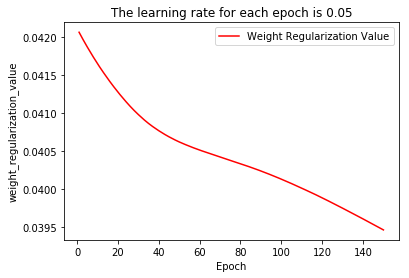

In [0]:
epoch_count = range(1, len(train_loss_result) + 1)
plt.plot(epoch_count, weight_regularization_result, 'r-')
plt.legend(['Weight Regularization Value'])
plt.title(f'The learning rate for each epoch is {learning_rate:0.2f}')
plt.xlabel('Epoch')
plt.ylabel('weight_regularization_value')
plt.show();

How did you determine the appropriate weight regularization parameter?

In the experiment, the second term is meant to decrease the magnitude of the weights and helps prevent overfitting. Some work pointed out that the second term with regularization parameter (weight decay parameter) should be a very small value that is a value not equal to 0. We choose 1e-5 first but surprisingly the weight regularization value monotonically increases. After adjusting, we choose 0.1.



Worth to mention that we added the weight regularization parameter and tried to always ensure that the reconstruction error part and the weight regularization for the encoder part are always at the relatively equal scale and the loss function is not dominated by either part. However, the weight_regularization_value by dynamically adjusting the weight decay parameter still increases monotonically and that reflects that we put way more importance on the regularization part and this dynamical adjusting way is not correct I think.

##Question 2 Part 1
One of the [first papers](https://www.cs.toronto.edu/~hinton/science.pdf) in the deep learning literature proposed greedy layer wise training of deep neural networks. A greedy deep autoencoder first trains the first autoencoder, uses the representation to train the second autoencoder, etc. Train a greedy deep network for the MNIST data with the following layer sizes 400 - 200 - 50 - 10 - 2. Train on a random sample of 20000 MNIST rows. Use sigmoid activation layers and determine an appropriate learning rate.

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class RBM(object):
  def __init__(self, num_inputs, num_hidden):
    # NOTE: This is called "Glorot" Uniform Initialization
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))

  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
    '''
    a1 = tf.nn.relu(
          tf.linalg.matmul(x, self.W1) + self.b1
          )
    '''
    
    
    
    a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
   
    return a1
    
  
  def decode(self, h):
    #change to sigmod function according to the requirement, but cannot get the good results
    '''
    a2 = tf.nn.sigmoid(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    '''
    a2 = tf.nn.relu(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
  #def step(self, inputs, outputs):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
   
    
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)
    


'''
#quick test the model's forward function 
learning_rate = .05
model_3 = RBM(784,400)
model_3.step(x_train[:5,:], x_train[:5,:], learning_rate)
layer_1_embedding=model_3.encode(x_train[:5, :])
#print(reconstruction_layer_1)
model_4 = RBM(400,200)
layer_2_embedding= model_4.encode(layer_1_embedding[:5,:])
model_5 = RBM(200,50)
layer_3_embedding= model_5.encode(layer_2_embedding[:5,:])
model_6 = RBM(50,10)
layer_4_embedding= model_6.encode(layer_3_embedding[:5,:])
model_7 = RBM(10,2)
layer_5_embedding= model_7.encode(layer_4_embedding[:5,:])
print(layer_5_embedding)
'''

    

In [0]:
learning_rate = .05
batch_size = 128
model_3 = RBM(784,400)



#Random select sample of 20000 MNIST rows as training data
random_ind = np.random.randint(x_train.shape[0], size=(20000,))
#print(random_ind)
x_train = x_train[random_ind]
#print(x_train.shape)

  

<Figure size 432x288 with 0 Axes>

In [0]:
for epoch in range(150):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model_3.step(x_train_, x_train_, learning_rate)

layer_1_embedding=model_3.encode(x_train)
print(layer_1_embedding.shape)
model_4 = RBM(400,200)
for epoch in range(150):
  for start_idx in range(0, layer_1_embedding.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = layer_1_embedding[start_idx:end_idx, :]
    model_4.step(x_train_, x_train_, learning_rate)
layer_2_embedding= model_4.encode(layer_1_embedding)
print(layer_2_embedding.shape)
model_5 = RBM(200,50)
for epoch in range(150):
  for start_idx in range(0, layer_2_embedding.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = layer_2_embedding[start_idx:end_idx, :]
    model_5.step(x_train_, x_train_, learning_rate)
layer_3_embedding= model_5.encode(layer_2_embedding)
print(layer_3_embedding.shape)
model_6 = RBM(50,10)
for epoch in range(150):
  for start_idx in range(0, layer_3_embedding.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = layer_3_embedding[start_idx:end_idx, :]
    model_6.step(x_train_, x_train_, learning_rate)
layer_4_embedding= model_6.encode(layer_3_embedding)
print(layer_4_embedding.shape)
model_7 = RBM(10,2)
for epoch in range(150):
  for start_idx in range(0, layer_4_embedding.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = layer_4_embedding[start_idx:end_idx, :]
    model_7.step(x_train_, x_train_, learning_rate)



  

(20000, 400)
(20000, 200)
(20000, 50)
(20000, 10)


In [0]:
#Get the testing data two dimensional representation
test_layer_1_embedding = model_3.encode(x_test)
test_layer_2_embedding = model_4.encode(test_layer_1_embedding)
test_layer_3_embedding = model_5.encode(test_layer_2_embedding)
test_layer_4_embedding = model_6.encode(test_layer_3_embedding)
test_layer_5_embedding = model_7.encode(test_layer_4_embedding)

print(test_layer_5_embedding)

tf.Tensor(
[[0.5361478  0.77145004]
 [0.5377871  0.77215385]
 [0.5360873  0.77143455]
 ...
 [0.5371154  0.7712331 ]
 [0.5374476  0.771294  ]
 [0.53644466 0.7721996 ]], shape=(10000, 2), dtype=float32)


Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

['pixel0', 'pixel1']
Size of the dataframe:(10000, 4)


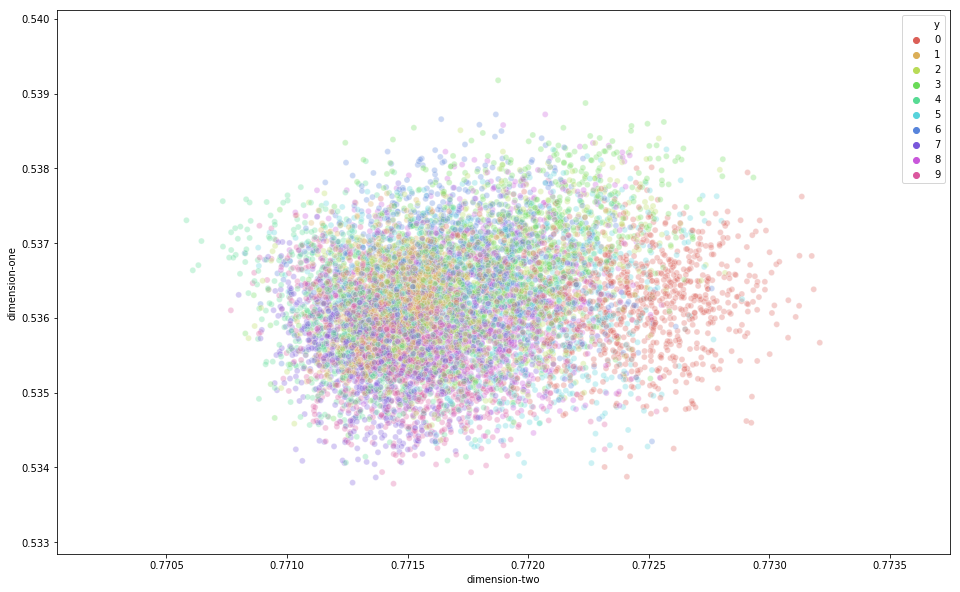

In [0]:
#Generate the DataFrame to plot the data
#The below piece of code is referred 
#https://towardsdatascience.com
feat_cols = ['pixel'+str(i) for i in range(test_layer_5_embedding.shape[1])]
print(feat_cols)
import pandas as pd
df = pd.DataFrame(test_layer_5_embedding, columns= feat_cols)

df['y'] = y_test
df['label'] = df['y'].apply(lambda i:str(i))
print('Size of the dataframe:{}'.format(df.shape))

df['dimension-one'] = test_layer_5_embedding[:,0]
df['dimension-two'] = test_layer_5_embedding[:,1]

plt.figure(figsize=(16,10))

import seaborn as sns
sns.scatterplot(
  x="dimension-two",
  y="dimension-one",
  hue = "y",
  palette =sns.color_palette("hls",10),
  data = df,
  legend="full",
  alpha = 0.3

)


## Question 2 Part 2
Instead of training a multi-layer deep architecture, train just one layer of size 2. Once again use sigmoid activation functions and determine an appropriate learning rate.

In [0]:
learning_rate = .05
batch_size = 128
model_8 = RBM(784,2)

#verify x_train is unchanged, still (20000,)
print(x_train.shape)

for epoch in range(150):
  for start_idx in range(0, x_train.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = x_train[start_idx:end_idx, :]
    model_8.step(x_train_, x_train_, learning_rate)
    
test_layer_6_embedding = model_8.encode(x_test)

print(test_layer_6_embedding)


(20000, 784)
tf.Tensor(
[[0.99528396 0.9940644 ]
 [0.9968461  0.9992987 ]
 [0.9810801  0.98153234]
 ...
 [0.9998916  0.9997852 ]
 [0.99900866 0.9993976 ]
 [0.9998465  0.9998988 ]], shape=(10000, 2), dtype=float32)


Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

['pixel0', 'pixel1']
Size of the dataframe:(10000, 4)


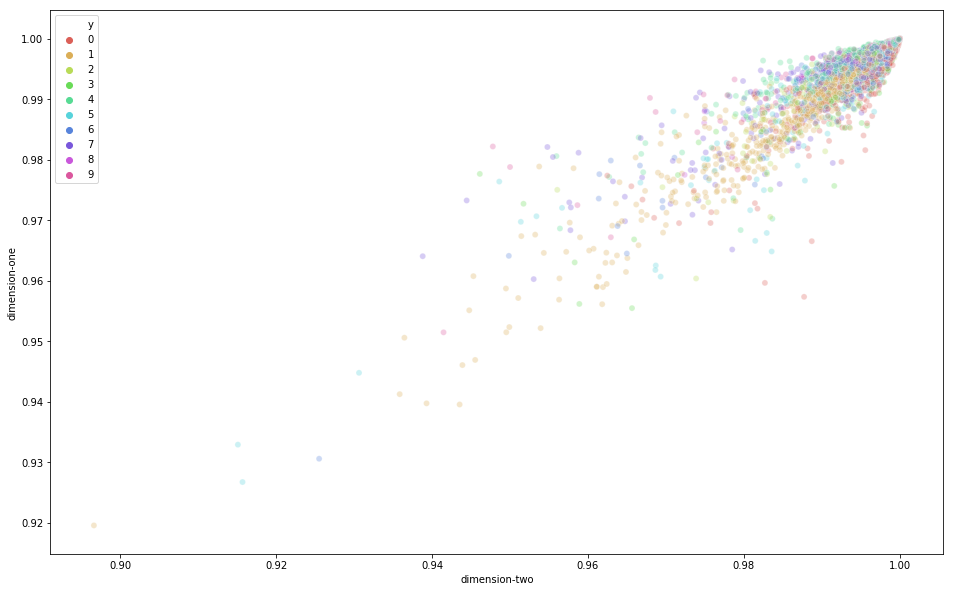

In [0]:
#Generate the DataFrame to plot the data
#The below piece of code is referred 
#https://towardsdatascience.com
feat_cols = ['pixel'+str(i) for i in range(test_layer_6_embedding.shape[1])]
print(feat_cols)
import pandas as pd
df = pd.DataFrame(test_layer_6_embedding, columns= feat_cols)

df['y'] = y_test
df['label'] = df['y'].apply(lambda i:str(i))
print('Size of the dataframe:{}'.format(df.shape))

df['dimension-one'] = test_layer_6_embedding[:,0]
df['dimension-two'] = test_layer_6_embedding[:,1]

plt.figure(figsize=(16,10))

import seaborn as sns
sns.scatterplot(
  x="dimension-two",
  y="dimension-one",
  hue = "y",
  palette =sns.color_palette("hls",10),
  data = df,
  legend="full",
  alpha = 0.3

)

## Question 2 Part 3
Train a standard feed-forward neural network with one hidden layer of size two and sigmoid activation functions for predicting which digit each of the training samples is from.

In [0]:
class Model9(object):
    def __init__(self, num_hidden=2 , num_output=10, num_inputs=784):
        self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
        self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
        self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_output),
                  minval=-np.sqrt(6/(1+num_output)),
                  maxval=np.sqrt(6/(1+num_output)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
        self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_output),
                  minval=-np.sqrt(6/(num_output+num_hidden)),
                  maxval=np.sqrt(6/(num_output+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))


    def __call__(self, x):
        return self.forward(x)

    def forward(self,x):

     a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
     a2 = tf.nn.softmax(
         tf.linalg.matmul(a1, self.W2)+ self.b2
     )
     return a2
  
    def embedding(self,x):
      a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
      
      return a1


      

In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))


def train_step(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [model.W1, model.W2, model.b1, model.b2])
  
  model.W1.assign_sub(learning_rate * dW1)
  model.W2.assign_sub(learning_rate * dW2)
  model.b1.assign_sub(learning_rate * db1)
  model.b2.assign_sub(learning_rate * db2)


In [0]:
learning_rate = .05
import tensorflow.contrib.eager as tfe

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)



(60000, 784)


In [0]:
model_9 =Model9()
BATCH_SIZE = 128


#create dataset by tensorflow data API
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
#print(train_dataset)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_batch_size= x_test.shape[0]
#print(test_batch_size)
test_dataset = test_dataset.batch(test_batch_size)

#keep results for plotting
train_loss_results =[]
train_accuracy_results =[]
test_loss_results = []
test_accuracy_results =[]

num_epochs =150

for epoch in range(num_epochs):
  current_accu = tfe.metrics.Accuracy()
  current_test_accu = tfe.metrics.Accuracy()
  for inputs, outputs in iter(train_dataset):
    outputs = tf.one_hot(outputs, 10, dtype='float32')
    train_step(model_9, inputs, outputs, learning_rate)
    
  
  current_loss = loss(model_9(inputs), outputs).numpy()
  current_accu (tf.argmax(model_9(inputs),axis=1,output_type=tf.int32),tf.argmax(outputs,axis=1,output_type=tf.int32))
  #append the train_loss and train_accu into list
  train_loss_results.append(current_loss)
  train_accuracy_results.append(current_accu.result())
  
  for test_inputs, test_outputs in iter(test_dataset):
    test_outputs = tf.one_hot(test_outputs, 10, dtype='float32')
    #print(test_outputs.shape)
  current_test_loss = loss(model_9(test_inputs), test_outputs).numpy()
  current_test_accu(tf.argmax(model_9(test_inputs),axis=1,output_type=tf.int32),tf.argmax(test_outputs,axis=1,output_type=tf.int32))
  #append the test_loss and test_accu into list
  test_loss_results.append(current_test_loss)
  test_accuracy_results.append(current_test_accu.result())
   
  #print(current_accu.result())
  print(f'The training loss value and accuracy for epoch {epoch} is {current_loss:0.2f}, accuracy is {current_accu.result():0.2f} ')
  print(f'The testing loss value and accuracy for epoch {epoch} is {current_test_loss:0.2f}, accuracy is {current_test_accu.result():0.2f} ')
  

The training loss value and accuracy for epoch 0 is 0.09, accuracy is 0.09 
The testing loss value and accuracy for epoch 0 is 0.09, accuracy is 0.12 
The training loss value and accuracy for epoch 1 is 0.09, accuracy is 0.09 
The testing loss value and accuracy for epoch 1 is 0.09, accuracy is 0.14 
The training loss value and accuracy for epoch 2 is 0.09, accuracy is 0.10 
The testing loss value and accuracy for epoch 2 is 0.09, accuracy is 0.15 
The training loss value and accuracy for epoch 3 is 0.09, accuracy is 0.12 
The testing loss value and accuracy for epoch 3 is 0.09, accuracy is 0.16 
The training loss value and accuracy for epoch 4 is 0.09, accuracy is 0.12 
The testing loss value and accuracy for epoch 4 is 0.09, accuracy is 0.17 
The training loss value and accuracy for epoch 5 is 0.09, accuracy is 0.15 
The testing loss value and accuracy for epoch 5 is 0.09, accuracy is 0.17 
The training loss value and accuracy for epoch 6 is 0.09, accuracy is 0.17 
The testing loss v

Pot the loss function and accuracy of your model

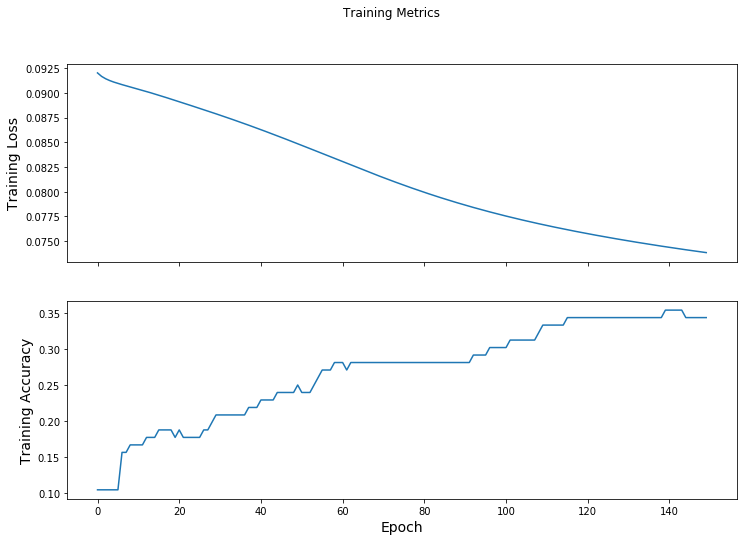

In [0]:
#The below piece of code refers tensorflow tutorials-- custom training walkthrough
#Training Metrics
fig, axes = plt.subplots(2,sharex=True, figsize =(12,8))
fig.suptitle('Training Metrics')
axes[0].set_ylabel("Training Loss",fontsize=14)
axes[0].plot(train_loss_results)
axes[1].set_ylabel("Training Accuracy",fontsize=14)
axes[1].set_xlabel("Epoch",fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

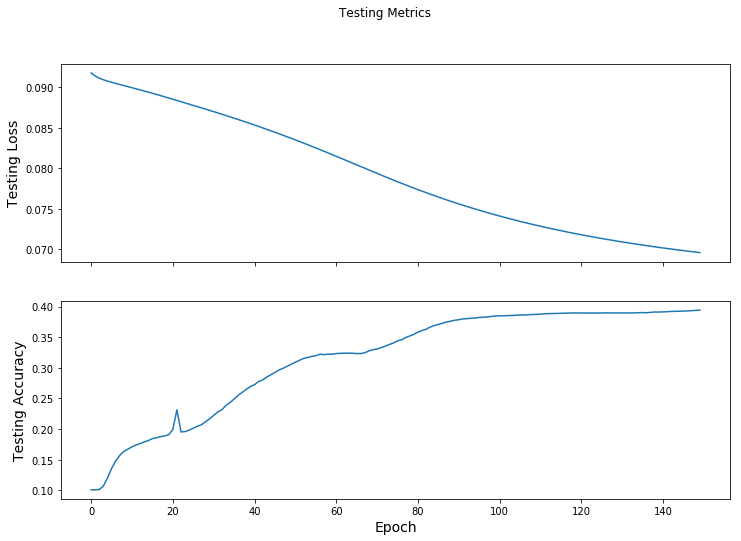

In [0]:
#The below piece of code refers tensorflow tutorials-- custom training walkthrough
#Testing Metrics
fig, axes = plt.subplots(2,sharex=True, figsize =(12,8))
fig.suptitle('Testing Metrics')
axes[0].set_ylabel("Testing Loss",fontsize=14)
axes[0].plot(test_loss_results)
axes[1].set_ylabel("Testing Accuracy",fontsize=14)
axes[1].set_xlabel("Epoch",fontsize=14)
axes[1].plot(test_accuracy_results)
plt.show()

Plot the two dimensional representation and the associated labels for the numbers for the testing data. See figure 3B in the above paper for an example.

In [0]:
test_layer_nn_embedding = model_9.embedding(x_test)

print(test_layer_nn_embedding)


tf.Tensor(
[[9.8694944e-01 9.9241233e-01]
 [2.6762486e-05 1.1497468e-02]
 [4.5169383e-02 2.2121072e-02]
 ...
 [8.7947452e-01 1.9345582e-03]
 [1.0350227e-02 8.3797097e-02]
 [1.3802052e-03 2.3199916e-03]], shape=(10000, 2), dtype=float32)


['pixel0', 'pixel1']
Size of the dataframe:(10000, 4)


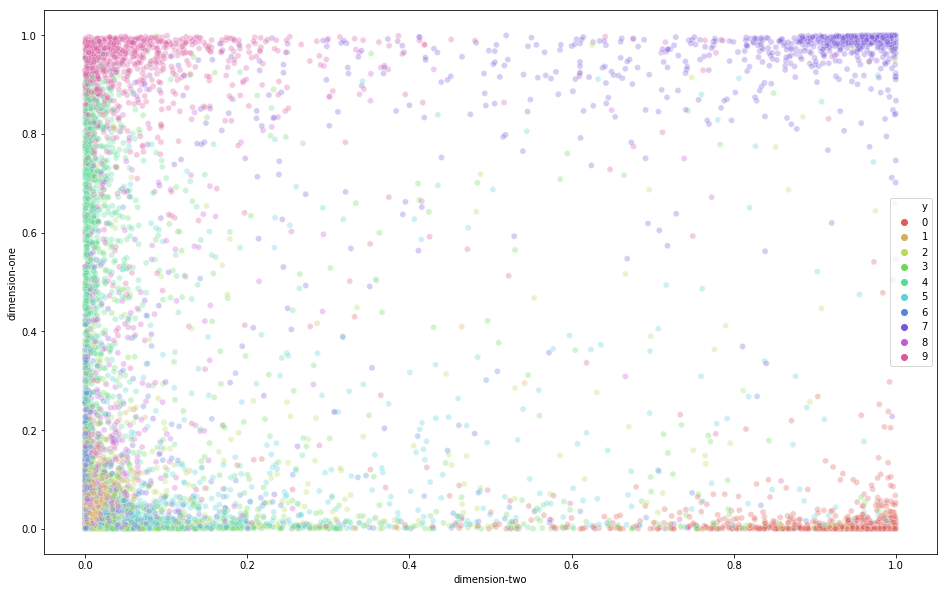

In [0]:
#Generate the DataFrame to plot the data
#The below piece of code is referred 
#https://towardsdatascience.com
feat_cols = ['pixel'+str(i) for i in range(test_layer_nn_embedding.shape[1])]
print(feat_cols)
import pandas as pd
df = pd.DataFrame(test_layer_nn_embedding, columns= feat_cols)

df['y'] = y_test
df['label'] = df['y'].apply(lambda i:str(i))
print('Size of the dataframe:{}'.format(df.shape))

df['dimension-one'] = test_layer_nn_embedding[:,0]
df['dimension-two'] = test_layer_nn_embedding[:,1]

plt.figure(figsize=(16,10))

import seaborn as sns
sns.scatterplot(
  x="dimension-two",
  y="dimension-one",
  hue = "y",
  palette =sns.color_palette("hls",10),
  data = df,
  legend="full",
  alpha = 0.3

)

## Question 2 Part 4
How different are the representations that the different approaches learned? What might make them different?

Part 1's representation basically can clustering nodes according to their labels since the model is trained layer by layer and all the parameters are fully trained
Part 2's two-dimensional representation you can clearly see that most of the embedding results are close to 1, which means the model cannot differentiate nodes among different classes. Either because the model is too shallow or the number of training epochs is not sufficient (we keep the same number of epochs for each RBM model as a fair comparison ) Part 3's representation is slightly better than part 2 since the nn.softmax layer is involved in the model.

# Question 3 Part 1
Build a denoising autoencoder for the MNIST data. On each batch, add random [normal gaussian noise](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) to the inputs and then [clip the values](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html) such that they are between 0 and 1. Evaluate the following mean and standard deviation values for the noise.

| Mean  | Standard Deviation |
|-------|--------------------|
| (loc) | (scale)            |
| 0.0   | 0.05               |
| 0.1   | 0.05               |
| 0.0   | 0.2                |
| 0.1   | 0.2                |

Your evaluation should compare the reconstruction error on the testing data with no added error. Use sigmoid activation functions with 64 hidden units.

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test = np.reshape(x_test, (x_test.shape[0], 28*28))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255. 

In [0]:
noise_factor =0.5
mu_1, sigma_1 = 0, 0.05 # mean and standard deviation
added_noise_1 = np.random.normal(mu_1, sigma_1, (x_train.shape[0],x_train.shape[1]))
#print(added_noise.shape)
noise_train_1 = x_train + noise_factor*added_noise_1
#print(noise_train_1.shape)
#clip the noise_train_1
noise_train_1=np.clip(noise_train_1, 0, 1)
#print(noise_train_1.shape)
noise_test_1 = x_test+ noise_factor*np.random.normal(mu_1, sigma_1, size=x_test.shape)
noise_test_1 = np.clip(noise_test_1,0,1)
noise_train_1 = noise_train_1.astype('float32')
noise_test_1 = noise_test_1.astype('float32')

mu_2, sigma_2 = 0.1, 0.05 # mean and standard deviation
added_noise_2 = np.random.normal(mu_2, sigma_2, (x_train.shape[0],x_train.shape[1]))
noise_train_2 = x_train + noise_factor*added_noise_2
noise_train_2= np.clip(noise_train_2, 0, 1)
noise_test_2 = x_test+ noise_factor*np.random.normal(mu_2, sigma_2, size=x_test.shape)
noise_test_2 = np.clip(noise_test_2,0,1)

mu_3, sigma_3 = 0.0, 0.2 # mean and standard deviation
added_noise_3 = np.random.normal(mu_3, sigma_3, (x_train.shape[0],x_train.shape[1]))
noise_train_3 = x_train + noise_factor*added_noise_3
noise_train_3= np.clip(noise_train_3, 0, 1)
noise_test_3 = x_test+ noise_factor*np.random.normal(mu_3, sigma_3, size=x_test.shape)
noise_test_3 = np.clip(noise_test_3,0,1)


mu_4, sigma_4 = 0.1, 0.2 # mean and standard deviation
added_noise_4 = np.random.normal(mu_4, sigma_4, (x_train.shape[0],x_train.shape[1]))
noise_train_4 = x_train + noise_factor*added_noise_4
noise_train_4 = np.clip(noise_train_4, 0, 1)
noise_test_4 = x_test+ noise_factor*np.random.normal(mu_4, sigma_4, size=x_test.shape)
noise_test_4 = np.clip(noise_test_4,0,1)





In [0]:
def loss(y_hat, y):
  return tf.reduce_mean(tf.square(y_hat - y))

class DenoiseModel(object):
  def __init__(self, num_inputs, num_hidden=64):
    # NOTE: This is called "Glorot" Uniform Initialization
    self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
    self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
    self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_inputs),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
    self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_inputs),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))
    self.previous_loss = []
  def __call__(self, x):
    return self.forward(x)
  
  def encode(self, x):
   
    a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
   
    return a1
    
  
  def decode(self, h):
 
    a2 = tf.nn.relu(
          tf.linalg.matmul(h, self.W2) + self.b2
          )
    return a2

  def forward(self, x):
    a1 = self.encode(x)
    a2 = self.decode(a1)
    return a2
  
  def step(self, inputs, outputs, learning_rate):
  #def step(self, inputs, outputs):
    with tf.GradientTape() as t:
      current_loss = loss(self(inputs), outputs)
    dW1, dW2, db1, db2 = t.gradient(current_loss, [self.W1, self.W2, self.b1, self.b2])
    
   
    
    
    # model.W1 = model.W1 - learning_rate * dW1
    self.W1.assign_sub(learning_rate * dW1)
    self.W2.assign_sub(learning_rate * dW2)
    self.b1.assign_sub(learning_rate * db1)
    self.b2.assign_sub(learning_rate * db2)

In [0]:
#Train model_10 based on noise_train_1 dataset

model_10 = DenoiseModel(noise_train_1.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
for epoch in range(150):
  for start_idx in range(0, noise_train_1.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = noise_train_1[start_idx:end_idx, :]
    model_10.step(x_train_, x_train_, learning_rate)


  train_loss = loss(x_train, model_10(noise_train_1))
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
    
  test_loss = loss(x_test, model_10(noise_test_1))
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')
  

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.09
The train loss value for epoch 1 is 0.08
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.08
The test loss value for epoch 2 is 0.08
The train loss value for epoch 3 is 0.08
The test loss value for epoch 3 is 0.08
The train loss value for epoch 4 is 0.08
The test loss value for epoch 4 is 0.08
The train loss value for epoch 5 is 0.08
The test loss value for epoch 5 is 0.08
The train loss value for epoch 6 is 0.08
The test loss value for epoch 6 is 0.08
The train loss value for epoch 7 is 0.08
The test loss value for epoch 7 is 0.08
The train loss value for epoch 8 is 0.08
The test loss value for epoch 8 is 0.08
The train loss value for epoch 9 is 0.08
The test loss value for epoch 9 is 0.08
The train loss value for epoch 10 is 0.08
The test loss value for epoch 10 is 0.08
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.08
The train loss value for

<Figure size 432x288 with 0 Axes>

The noisy input is as below:
The autoencoder output is as below:


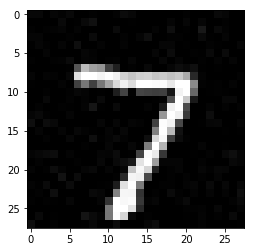

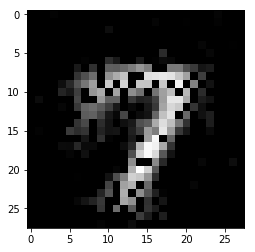

In [0]:
x_test_hat_1 = model_10(noise_test_1)
#test one image
#Noisy input
noise_test_img = np.reshape(noise_test_1[0,:],(28,28))
print("The noisy input is as below:")
plt.imshow(noise_test_img,cmap=plt.cm.gray)
#Autoencoder output
fig = plt.figure()
print("The autoencoder output is as below:")
test_img = np.reshape(x_test_hat_1.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

In [0]:
noise_train_2 = noise_train_2.astype('float32')
noise_test_2 = noise_test_2.astype('float32')

#Train model_11 based on noise_train_2 dataset

model_11 = DenoiseModel(noise_train_2.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
for epoch in range(150):
  for start_idx in range(0, noise_train_2.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = noise_train_2[start_idx:end_idx, :]
    model_11.step(x_train_, x_train_, learning_rate)


  train_loss = loss(x_train, model_11(noise_train_2))
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
    
  test_loss = loss(x_test, model_11(noise_test_2))
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.09
The train loss value for epoch 1 is 0.09
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.09
The test loss value for epoch 2 is 0.09
The train loss value for epoch 3 is 0.09
The test loss value for epoch 3 is 0.09
The train loss value for epoch 4 is 0.09
The test loss value for epoch 4 is 0.09
The train loss value for epoch 5 is 0.09
The test loss value for epoch 5 is 0.09
The train loss value for epoch 6 is 0.09
The test loss value for epoch 6 is 0.09
The train loss value for epoch 7 is 0.09
The test loss value for epoch 7 is 0.09
The train loss value for epoch 8 is 0.09
The test loss value for epoch 8 is 0.09
The train loss value for epoch 9 is 0.08
The test loss value for epoch 9 is 0.09
The train loss value for epoch 10 is 0.08
The test loss value for epoch 10 is 0.09
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.09
The train loss value for

<Figure size 432x288 with 0 Axes>

The noisy input is as below:
The autoencoder output is as below:


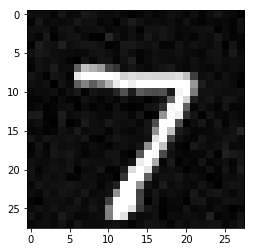

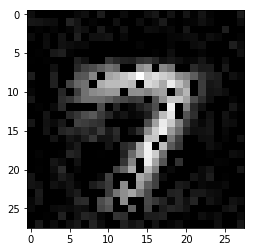

In [0]:
x_test_hat_2 = model_11(noise_test_2)
#test one image
#Noisy input
noise_test_img = np.reshape(noise_test_2[0,:],(28,28))
print("The noisy input is as below:")
plt.imshow(noise_test_img,cmap=plt.cm.gray)
#Autoencoder output
fig = plt.figure()
print("The autoencoder output is as below:")
test_img = np.reshape(x_test_hat_2.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

In [0]:
noise_train_3 = noise_train_3.astype('float32')
noise_test_3 = noise_test_3.astype('float32')

#Train model_12 based on noise_train_3 dataset

model_12 = DenoiseModel(noise_train_3.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
for epoch in range(150):
  for start_idx in range(0, noise_train_3.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = noise_train_3[start_idx:end_idx, :]
    model_12.step(x_train_, x_train_, learning_rate)


  train_loss = loss(x_train, model_12(noise_train_3))
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
    
  test_loss = loss(x_test, model_12(noise_test_3))
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.09
The train loss value for epoch 1 is 0.09
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.09
The test loss value for epoch 2 is 0.09
The train loss value for epoch 3 is 0.09
The test loss value for epoch 3 is 0.09
The train loss value for epoch 4 is 0.09
The test loss value for epoch 4 is 0.09
The train loss value for epoch 5 is 0.09
The test loss value for epoch 5 is 0.09
The train loss value for epoch 6 is 0.08
The test loss value for epoch 6 is 0.09
The train loss value for epoch 7 is 0.08
The test loss value for epoch 7 is 0.09
The train loss value for epoch 8 is 0.08
The test loss value for epoch 8 is 0.09
The train loss value for epoch 9 is 0.08
The test loss value for epoch 9 is 0.08
The train loss value for epoch 10 is 0.08
The test loss value for epoch 10 is 0.08
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.08
The train loss value for

<Figure size 432x288 with 0 Axes>

The noisy input is as below:
The autoencoder output is as below:


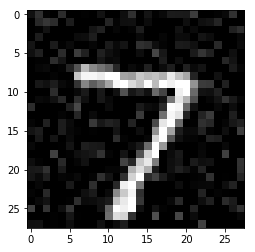

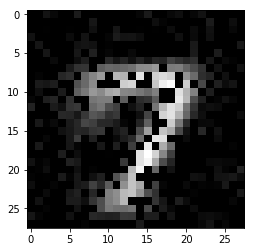

In [0]:
x_test_hat_3 = model_12(noise_test_3)
#test one image
#Noisy input
noise_test_img = np.reshape(noise_test_3[0,:],(28,28))
print("The noisy input is as below:")
plt.imshow(noise_test_img,cmap=plt.cm.gray)
#Autoencoder output
fig = plt.figure()
print("The autoencoder output is as below:")
test_img = np.reshape(x_test_hat_3.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

In [0]:
noise_train_4 = noise_train_4.astype('float32')
noise_test_4 = noise_test_4.astype('float32')

#Train model_13 based on noise_train_4 dataset

model_13 = DenoiseModel(noise_train_4.shape[1], num_hidden=64)
learning_rate = .05
batch_size = 128
fig = plt.figure()
train_loss_result =[]
test_loss_result =[]
for epoch in range(150):
  for start_idx in range(0, noise_train_4.shape[0], batch_size):
    end_idx = start_idx + batch_size
    x_train_ = noise_train_4[start_idx:end_idx, :]
    model_13.step(x_train_, x_train_, learning_rate)


  train_loss = loss(x_train, model_13(noise_train_4))
  
  tf.summary.scalar("current_step", epoch)
  tf.summary.scalar("loss", train_loss)
  
  
  
  train_loss_result.append(train_loss)
    
  test_loss = loss(x_test, model_13(noise_test_4))
  test_loss_result.append(test_loss)

  print(f'The train loss value for epoch {epoch} is {train_loss:0.2f}')
  print(f'The test loss value for epoch {epoch} is {test_loss:0.2f}')

The train loss value for epoch 0 is 0.09
The test loss value for epoch 0 is 0.09
The train loss value for epoch 1 is 0.09
The test loss value for epoch 1 is 0.09
The train loss value for epoch 2 is 0.09
The test loss value for epoch 2 is 0.09
The train loss value for epoch 3 is 0.09
The test loss value for epoch 3 is 0.09
The train loss value for epoch 4 is 0.09
The test loss value for epoch 4 is 0.09
The train loss value for epoch 5 is 0.09
The test loss value for epoch 5 is 0.09
The train loss value for epoch 6 is 0.08
The test loss value for epoch 6 is 0.09
The train loss value for epoch 7 is 0.08
The test loss value for epoch 7 is 0.09
The train loss value for epoch 8 is 0.08
The test loss value for epoch 8 is 0.08
The train loss value for epoch 9 is 0.08
The test loss value for epoch 9 is 0.08
The train loss value for epoch 10 is 0.08
The test loss value for epoch 10 is 0.08
The train loss value for epoch 11 is 0.08
The test loss value for epoch 11 is 0.08
The train loss value for

<Figure size 432x288 with 0 Axes>

The noisy input is as below:
The autoencoder output is as below:


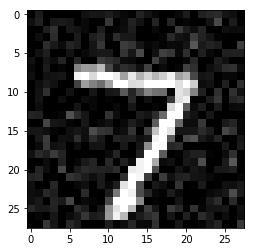

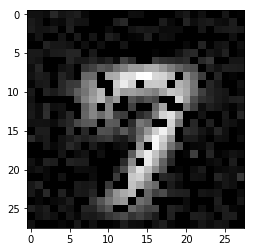

In [0]:
x_test_hat_4 = model_13(noise_test_4)
#test one image
#Noisy input
noise_test_img = np.reshape(noise_test_4[0,:],(28,28))
print("The noisy input is as below:")
plt.imshow(noise_test_img,cmap=plt.cm.gray)
#Autoencoder output
fig = plt.figure()
print("The autoencoder output is as below:")
test_img = np.reshape(x_test_hat_4.numpy()[0,:], (28, 28))
plt.imshow(test_img, cmap=plt.cm.gray)

## Question 3 Part 2
Choose one of the denoising autencoders from the previous step. Use the hidden representation to train a model to predict the number present in the image.

In [0]:
class Model14(object):
    def __init__(self, num_hidden=32 , num_output=10, num_inputs=64):
        self.b1 = tf.Variable(tf.random.uniform(
                  (1, num_hidden),
                  minval=-np.sqrt(6/(1+num_hidden)),
                  maxval=np.sqrt(6/(1+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b1'))
        self.W1 = tf.Variable(tf.random.uniform(
                  (num_inputs, num_hidden),
                  minval=-np.sqrt(6/(num_inputs+num_hidden)),
                  maxval=np.sqrt(6/(num_inputs+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W1'))
        self.b2 = tf.Variable(tf.random.uniform(
                  (1, num_output),
                  minval=-np.sqrt(6/(1+num_output)),
                  maxval=np.sqrt(6/(1+num_output)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='b2'))
        self.W2 = tf.Variable(tf.random.uniform(
                  (num_hidden, num_output),
                  minval=-np.sqrt(6/(num_output+num_hidden)),
                  maxval=np.sqrt(6/(num_output+num_hidden)),
                  dtype=tf.dtypes.float32,
                  seed=None,
                  name='W2'))


    def __call__(self, x):
        return self.forward(x)

    def forward(self,x):

     a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
     a2 = tf.nn.softmax(
         tf.linalg.matmul(a1, self.W2)+ self.b2
     )
     return a2
  
    def embedding(self,x):
      a1 = tf.sigmoid(
         tf.linalg.matmul(x,self.W1)+self.b1
         )
      
      return a1

In [0]:
#I choose the denoising autencoders with Mean 0.0	Standard Deviation 0.2
#Get the new training instances
layer_denoise_train_embedding=model_13.encode(noise_train_4)
print(layer_denoise_embedding)
layer_denoise_test_embedding=model_13.encode(noise_test_4)


tf.Tensor(
[[0.59725934 0.42371336 0.7842946  ... 0.745805   0.45588374 0.25131774]
 [0.72811013 0.6565505  0.5798022  ... 0.63764113 0.64396983 0.6364632 ]
 [0.42747414 0.8020736  0.2541902  ... 0.20213875 0.86303675 0.6286645 ]
 ...
 [0.6063926  0.555293   0.636033   ... 0.69810945 0.6235546  0.29747576]
 [0.42934695 0.4555441  0.44227567 ... 0.47126752 0.57490516 0.69426197]
 [0.7256694  0.43829978 0.35194814 ... 0.39751828 0.61878854 0.7631442 ]], shape=(60000, 64), dtype=float32)


In [0]:
learning_rate = .05
import tensorflow.contrib.eager as tfe



In [0]:
model_14 =Model14()
BATCH_SIZE = 128


#create dataset by tensorflow data API
train_dataset = tf.data.Dataset.from_tensor_slices((layer_denoise_train_embedding, y_train))
#We use noise_test_3 instead of x_test as test instances
test_dataset = tf.data.Dataset.from_tensor_slices((layer_denoise_test_embedding, y_test))
train_dataset = train_dataset.batch(BATCH_SIZE)
test_batch_size= noise_test_3.shape[0]
#print(test_batch_size)
test_dataset = test_dataset.batch(test_batch_size)


  

In [0]:
#keep results for plotting
train_loss_results =[]
train_accuracy_results =[]
test_loss_results = []
test_accuracy_results =[]

num_epochs =150

for epoch in range(num_epochs):
  current_accu = tfe.metrics.Accuracy()
  current_test_accu = tfe.metrics.Accuracy()
  for inputs, outputs in iter(train_dataset):
    outputs = tf.one_hot(outputs, 10, dtype='float32')
    train_step(model_14, inputs, outputs, learning_rate)
    
  
  current_loss = loss(model_14(inputs), outputs).numpy()
  current_accu (tf.argmax(model_14(inputs),axis=1,output_type=tf.int32),tf.argmax(outputs,axis=1,output_type=tf.int32))
  #append the train_loss and train_accu into list
  train_loss_results.append(current_loss)
  train_accuracy_results.append(current_accu.result())
  
  for test_inputs, test_outputs in iter(test_dataset):
    test_outputs = tf.one_hot(test_outputs, 10, dtype='float32')
    #print(test_outputs.shape)
  current_test_loss = loss(model_14(test_inputs), test_outputs).numpy()
  current_test_accu(tf.argmax(model_14(test_inputs),axis=1,output_type=tf.int32),tf.argmax(test_outputs,axis=1,output_type=tf.int32))
  #append the test_loss and test_accu into list
  test_loss_results.append(current_test_loss)
  test_accuracy_results.append(current_test_accu.result())
   
  #print(current_accu.result())
  print(f'The training loss value and accuracy for epoch {epoch} is {current_loss:0.2f}, accuracy is {current_accu.result():0.2f} ')
  print(f'The testing loss value and accuracy for epoch {epoch} is {current_test_loss:0.2f}, accuracy is {current_test_accu.result():0.2f} ')

The training loss value and accuracy for epoch 0 is 0.09, accuracy is 0.17 
The testing loss value and accuracy for epoch 0 is 0.09, accuracy is 0.11 
The training loss value and accuracy for epoch 1 is 0.09, accuracy is 0.16 
The testing loss value and accuracy for epoch 1 is 0.09, accuracy is 0.13 
The training loss value and accuracy for epoch 2 is 0.09, accuracy is 0.16 
The testing loss value and accuracy for epoch 2 is 0.09, accuracy is 0.15 
The training loss value and accuracy for epoch 3 is 0.09, accuracy is 0.16 
The testing loss value and accuracy for epoch 3 is 0.09, accuracy is 0.16 
The training loss value and accuracy for epoch 4 is 0.09, accuracy is 0.17 
The testing loss value and accuracy for epoch 4 is 0.09, accuracy is 0.17 
The training loss value and accuracy for epoch 5 is 0.09, accuracy is 0.18 
The testing loss value and accuracy for epoch 5 is 0.09, accuracy is 0.19 
The training loss value and accuracy for epoch 6 is 0.09, accuracy is 0.18 
The testing loss v

Plot the training and testing accuracy for each epoch during training.

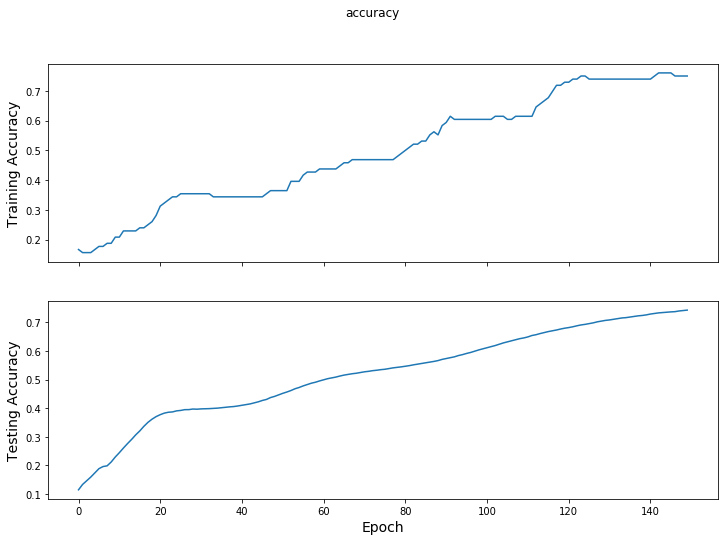

In [0]:
#The below piece of code refers tensorflow tutorials-- custom training walkthrough
fig, axes = plt.subplots(2,sharex=True, figsize =(12,8))
fig.suptitle('accuracy')
axes[0].set_ylabel("Training Accuracy",fontsize=14)
axes[0].plot(train_accuracy_results)
axes[1].set_ylabel("Testing Accuracy",fontsize=14)
axes[1].set_xlabel("Epoch",fontsize=14)
axes[1].plot(test_accuracy_results)
plt.show()